<a href="https://colab.research.google.com/github/manpriyad/Alt/blob/master/Hyper_Paramter_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Link : https://github.com/krishnaik06/Car-Price-Prediction/blob/master/Untitled.ipynb

In [5]:
import pandas as pd 
import numpy as np


In [6]:
# https://github.com/krishnaik06/Car-Price-Prediction/blob/master/Untitled.ipynb

In [7]:
df=pd.read_csv('/content/car data.csv')

In [8]:
df.head(2)


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0


In [9]:
df['Current_Year']=2021

In [10]:
df['car_age']=df['Current_Year']-df['Year']

In [11]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Current_Year',
       'car_age'],
      dtype='object')

In [12]:
df1=df[['Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner','car_age']]
# [[ 'Selling_Price', 'Present_Price', 'Kms_Driven', 'car_age']]
df1.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
df1.head(2)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8


In [14]:

df1=pd.get_dummies(df1,drop_first=True)

In [15]:
df1.head(2)

,Selling_Price,Present_Price,Kms_Driven,Owner,car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1


In [16]:
# Lets consider only Age and Fare columns 

In [17]:
x=df1.iloc[:,1:]
y=df1.iloc[:,0]

In [18]:
# Feature importance 
import sklearn
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [19]:
model.feature_importances_

array([0.36862325, 0.04254877, 0.00038941, 0.0796228 , 0.24333615,
       0.0061514 , 0.13031893, 0.12900929])

In [20]:
import matplotlib.pyplot as plt


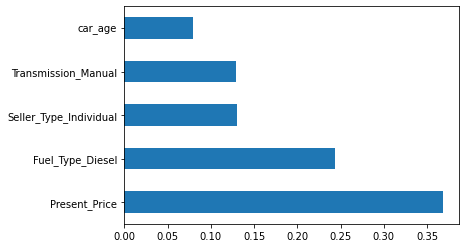

In [21]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)



In [25]:
from sklearn.ensemble import RandomForestRegressor

regressor=RandomForestRegressor()



Hyper-paramter tuning means we play with each and every paramenters inside RandomForestRegressor 

i.e 

def __init__(n_estimators=100, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)


n_estimators: The n_estimators parameter specifies the number of trees in the forest of the model. 

The default value for this parameter is 10, which means that 10 different decision trees will be constructed in the random forest.

In [27]:
[int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]

In [ ]:

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)


As shown in upper code , we will play with other paramters inside Random forest regressor .

we will use RandomSearch CV and not GridSearchCV as RandomSearchCV is faster

In [28]:

from sklearn.model_selection import RandomizedSearchCV

In [29]:
#Randomized Search CV
## default criterion for RF regressor is 'mse'

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print('\n Number of trees in random forest \n',n_estimators)
# Number of features to consider at every split
max_features = ['auto', 'sqrt']

print('\n Number of features to consider at every split \n',max_features)

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
print('\n Maximum number of levels in tree \n',max_depth)


# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


 Number of trees in random forest 
 [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]

 Number of features to consider at every split 
 ['auto', 'sqrt']

 Maximum number of levels in tree 
 [5, 10, 15, 20, 25, 30]


In [30]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


### Use the random grid to search for best hyperparameters
###       Apply Randomized Search CV

#### First create the base model to tune

In [33]:
# First create the base model to tune
rf = RandomForestRegressor()

In [34]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(
          estimator = rf, 
          param_distributions = random_grid,
          scoring='neg_mean_squared_error', 
          n_iter = 10, cv = 5, 
           random_state=42, 
           n_jobs = 1)



## n_jobs : how many cores of system is used

In [35]:
rf_random.fit(X_train,y_train)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [36]:
rf_random.best_params_

{'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [37]:
rf_random.best_score_

-4.01121537408644

In [38]:
predictions=rf_random.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


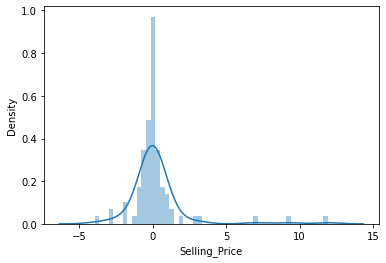

In [40]:
import seaborn as sns
sns.distplot(y_test-predictions)

Above graph shows that the difference between ytest and predictions is min and their distributions show normal distribution with closed range (-5 to +5)

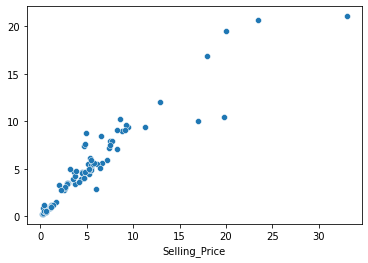

In [41]:
sns.scatterplot(x=y_test,y=predictions)

y_test vs predictions are pretty mich linear so its good

In [42]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.8935828571428573
MSE: 3.951981163145055
RMSE: 1.9879590446347368
